# **Heart Failure Prediction**

# **Introduction**

In [ ]:
#Import libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Shape of the dataset
print("Shape of the dataset is: "+str(data.shape))
#Is there any null values in the data?
print("Amount of null values in data: "+ str(data.isnull().sum().sum()))
print("There's no missing data!")

Shape of the dataset is: (918, 12)
Amount of null values in data: 0
There's no missing data!


In [ ]:
#Check balance of the output variables
grouped = data.groupby(['HeartDisease'])['HeartDisease'].count()
print('Number of people with heart disease: ' + str(grouped[1]))
print('Number of people without heart disease: ' + str(grouped[0]))

Number of people with heart disease: 508
Number of people without heart disease: 410


# **Exploratory Data Analysis**

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
713,64,F,NAP,140,313,0,Normal,133,N,0.2,Up,0
453,60,M,ASY,120,0,0,Normal,133,Y,2.0,Up,0
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0
511,63,M,ASY,160,267,1,ST,88,Y,2.0,Flat,1
472,53,M,ASY,154,0,1,ST,140,Y,1.5,Flat,1


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print("We divide the variables into 2 lists, one for categorical and the other for numerical")
categorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease','FastingBS']
numerical = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
print('Numerical Columns: ' + str(numerical))
print('Categorical Columns: ' + str(categorical))

We divide the variables into 2 lists, one for categorical and the other for numerical
Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'FastingBS']


## **Categorical Variables**

In [ ]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

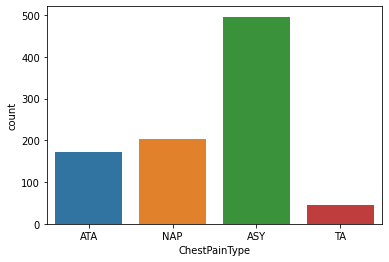

In [ ]:
sns.countplot(x = 'ChestPainType', data = data)
plt.show()

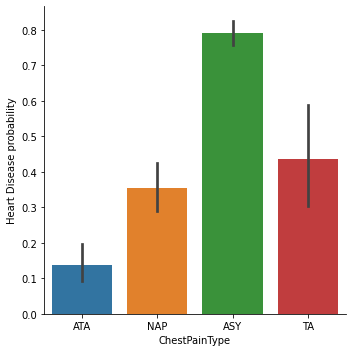

In [ ]:
# plotting ChestPainType vs Heart Disease probability
plot_chestpain = sns.catplot(x = "ChestPainType", y = "HeartDisease", kind = "bar", data = data).set_ylabels("Heart Disease probability")

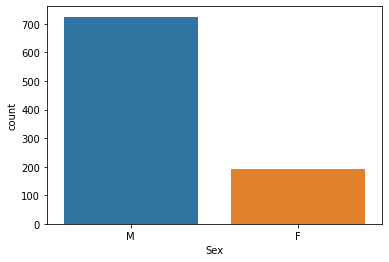

In [ ]:
sns.countplot(x = 'Sex',data = data)
plt.show()

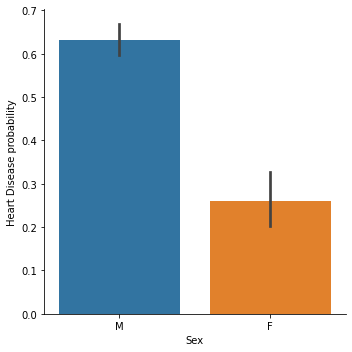

In [ ]:
# plotting Sex vs Heart Disease probability
plot = sns.catplot(x = "Sex", y = "HeartDisease", kind = "bar", data = data).set_ylabels("Heart Disease probability")

In [ ]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

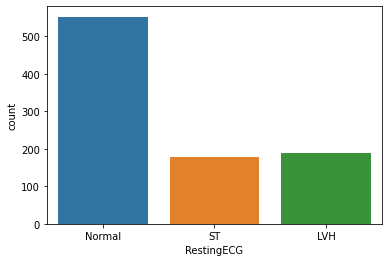

In [ ]:
sns.countplot(x = 'RestingECG',data = data)
plt.show()

In [ ]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

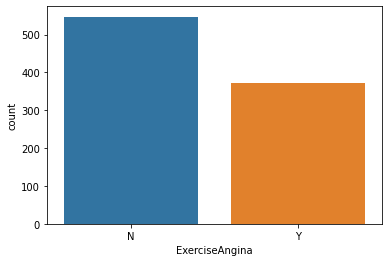

In [ ]:
sns.countplot(x = 'ExerciseAngina',data = data)
plt.show()

In [ ]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

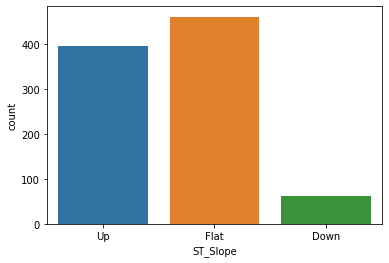

In [ ]:
sns.countplot(x = 'ST_Slope',data = data)
plt.show()

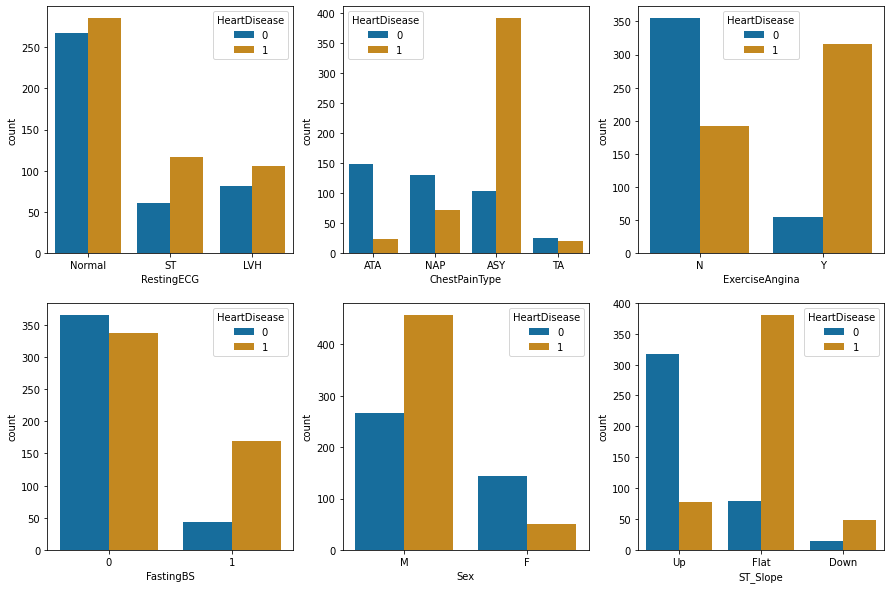

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_alpha(0.3)

sns.countplot(x = data['RestingECG'], data = data, palette='colorblind', ax=axes[0,0],hue = "HeartDisease")
sns.countplot(x = data['ChestPainType'], data = data, palette='colorblind', ax=axes[0,1],hue = "HeartDisease")
sns.countplot(x = data['ExerciseAngina'], data = data, palette='colorblind', ax=axes[0,2],hue = "HeartDisease")
sns.countplot(x = data['FastingBS'], data = data, palette='colorblind', ax=axes[1,0],hue = "HeartDisease")
sns.countplot(x = data['Sex'], data = data, palette='colorblind', ax=axes[1,1],hue = "HeartDisease")
sns.countplot(x = data['ST_Slope'], data = data, palette='colorblind', ax=axes[1,2],hue = "HeartDisease")
plt.show();

Decoding these plots can be somewhat tricky.
We had more data for people with heart disease than not. So, small differences between two hues are ignored. After carefully analysing these plots, we can get following insights:

* People with ST-T wave abnormalities are more likely to have a heart disease.
*There is an alarmingly high amount of patients with Asymptomatic heart diseases.
* People who get Exercise induced Angina are more likely to have a heart disease.
* People with high fasting blood sugar levels are more likely to have a heart disease.
* Men are more likely to get heart diseases than women.
* People with flat or down ST_Slope are more likely to have a heart disease.

## **Numerical Variables**

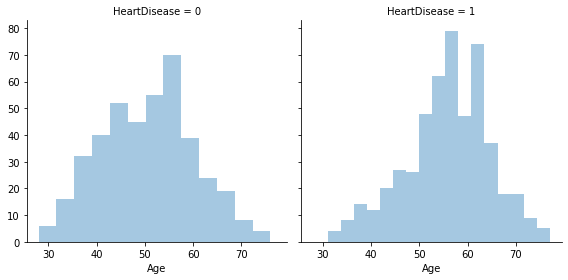

In [ ]:
# Look at the Age histogram for NoHeartDisease/HeartDisease (0/1)
plot = sns.FacetGrid(data, col='HeartDisease', height=4).map(sns.distplot, "Age", kde=False);

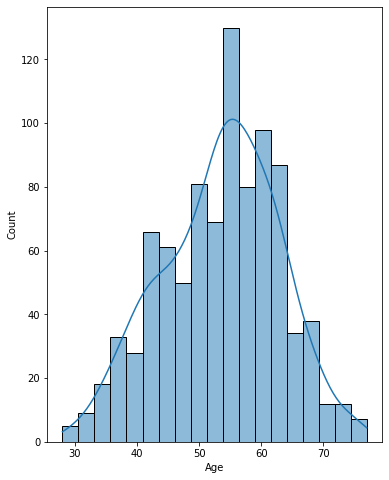

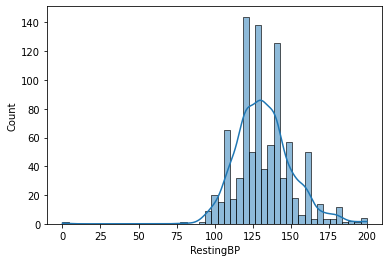

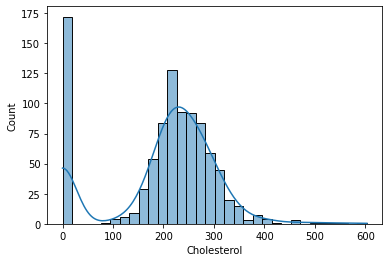

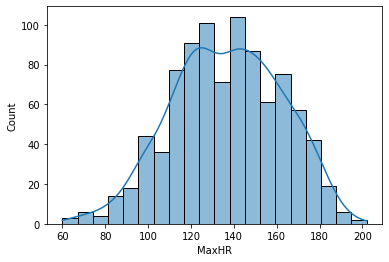

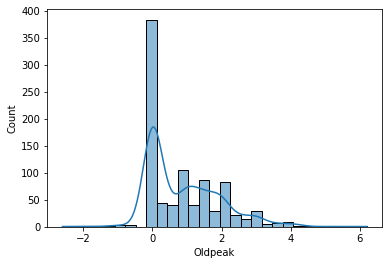

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop(categorical, axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True)
    plt.show()

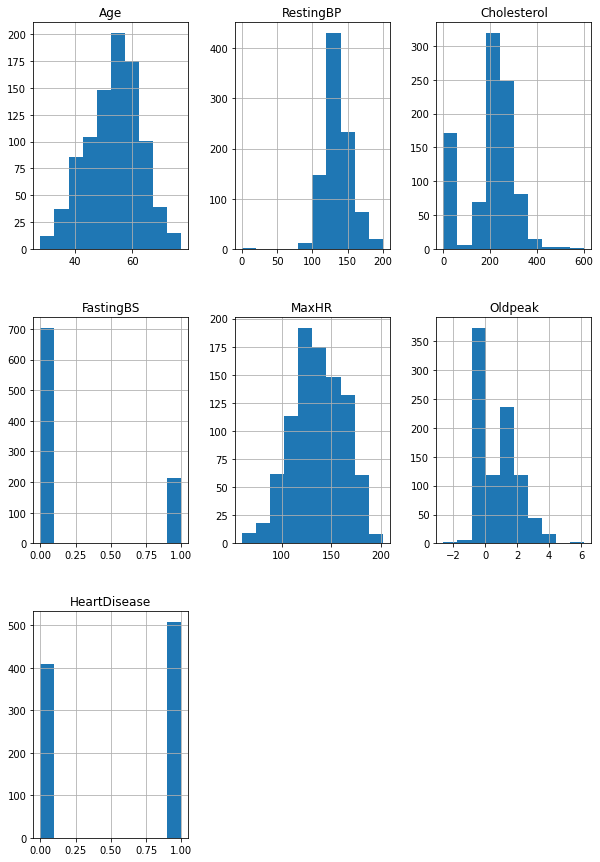

In [ ]:
data.hist(figsize=(10,15));

In [ ]:
corr_matrix = data.corr()    
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

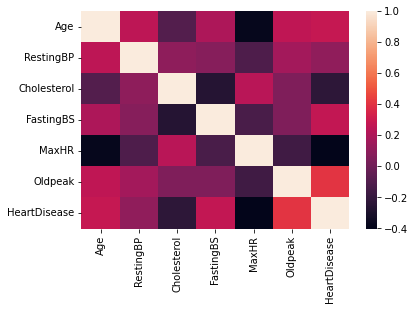

In [ ]:
# Visualizing the correlation matrix
sns.heatmap(corr_matrix, annot = False);

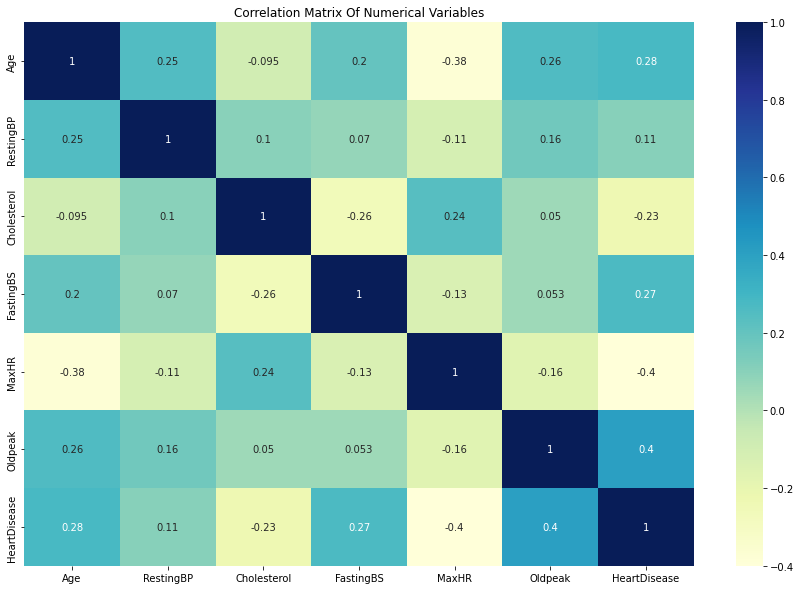

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
ax.set_title('Correlation Matrix Of Numerical Variables')
plt.show();

Here, we plot a shifted correlation matrix since the diagonal correlation is less relevant. Our new matrix focuses only on relevant cases



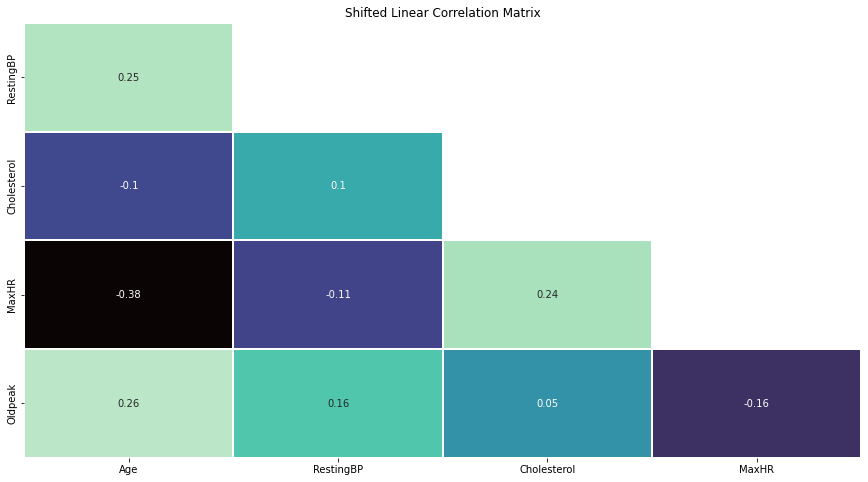

In [ ]:
def corrMatrix(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(15, 8))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask, vmin=-0.3, vmax=0.3, center=0, 
                cmap='mako', square=False, lw=2, annot=True, cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')

print('Here, we plot a shifted correlation matrix since the diagonal correlation is less relevant. Our new matrix focuses only on relevant cases')
print()
corrMatrix(x);

Here, we only plot correlation values relative to our target variable, HeartDisease


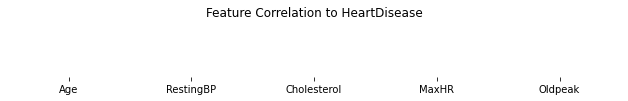

In [ ]:
def corr_for_hd(df,target='HeartDisease', figsize=(11, 1),ret_id=False):
    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr

print('Here, we only plot correlation values relative to our target variable, HeartDisease')
corr_for_hd(x);

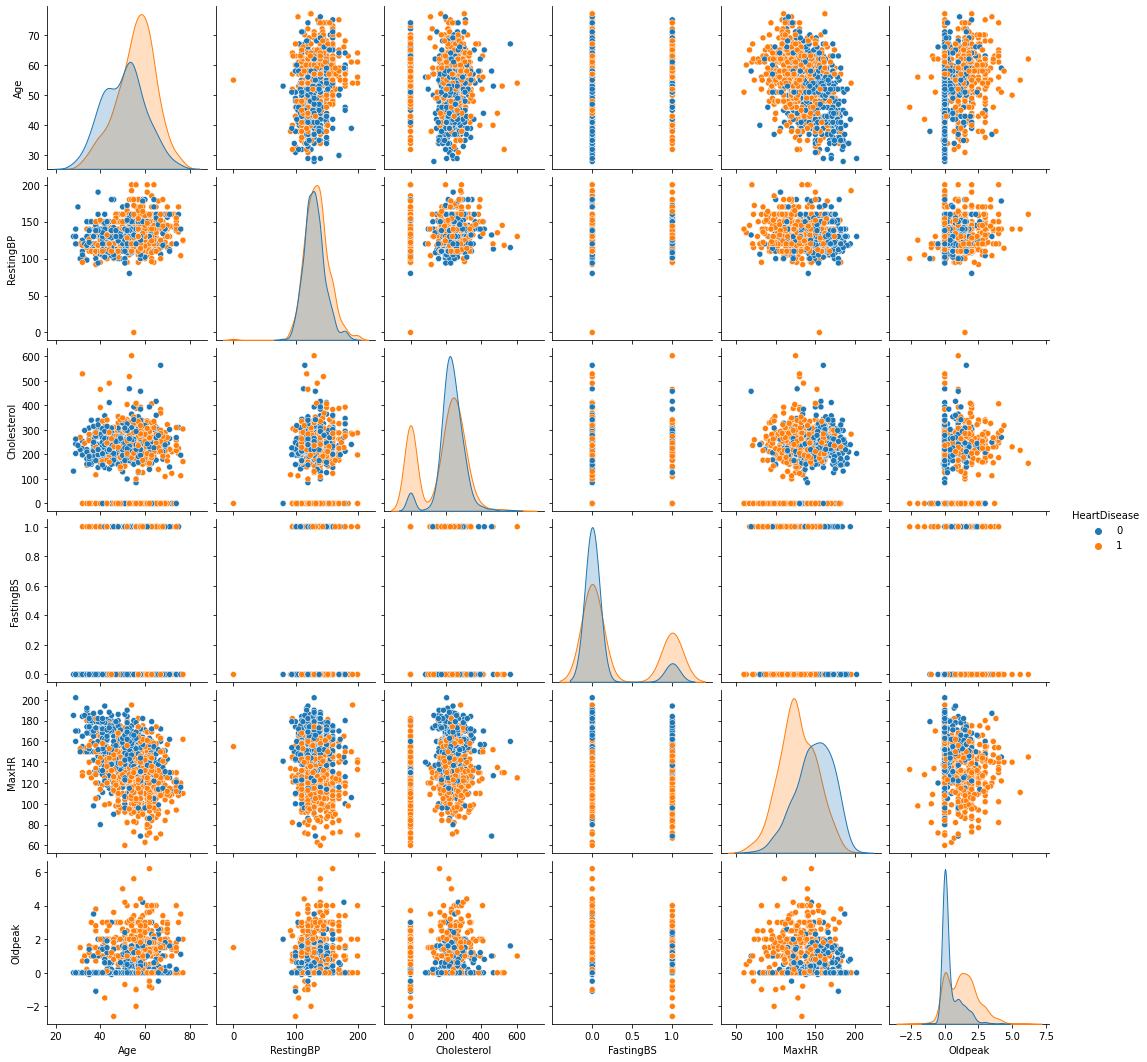

In [ ]:
# sns.pairplot(data, diag_kind='kde', hue='HeartDisease', cma);
sns.pairplot(data, diag_kind='kde', hue='HeartDisease');

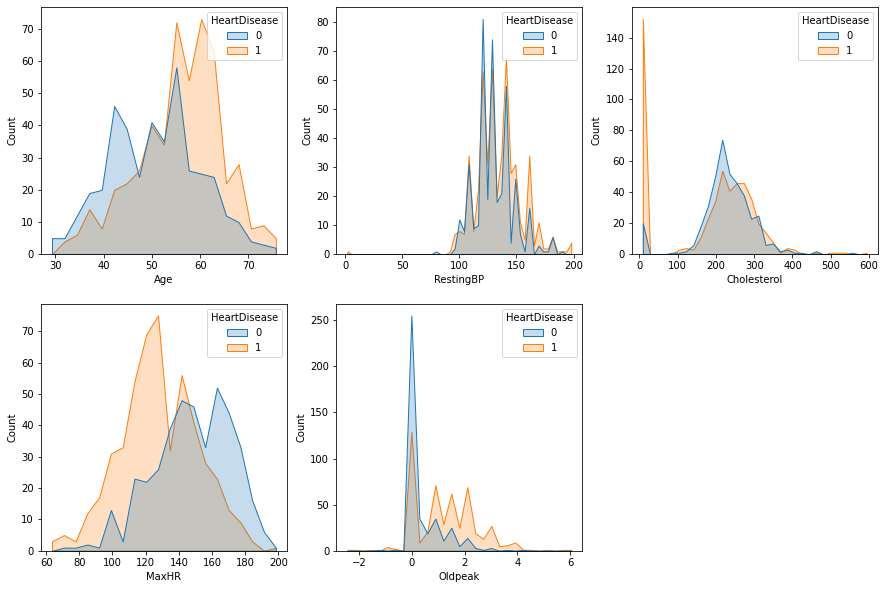

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_alpha(0.2)

sns.histplot(data = data,x = data['Age'],hue = "HeartDisease",element="poly",ax=axes[0,0])
sns.histplot(data = data,x = data['RestingBP'],hue = "HeartDisease",element="poly",ax=axes[0,1])
sns.histplot(data = data,x = data['Cholesterol'],hue = "HeartDisease",element="poly",ax=axes[0,2])
sns.histplot(data = data,x = data['MaxHR'],hue = "HeartDisease",element="poly",ax=axes[1,0])
sns.histplot(data = data,x = data['Oldpeak'],hue = "HeartDisease",element="poly",ax=axes[1,1])
fig.delaxes(axes[1][2])
plt.show();

We can get following insights from Numerical variables:

* People tend to get more susceptible to heart diseases as they get older.
* Resting blood pressures of people with and without heart diseases are kinda similar. Maybe Resting BP is slightly higher for people with heart disease.
* There are unusually high amount of people with zero cholesterol level. This might be a error in data. We have to see about that while considering variables for Machine Learning.
* Maximum heart rate is lower (Highest count is around 120) for most people with heart diseases. Healthy (No heart Disease) people tend to have higher Maximum Heart Rate.
* ST wave depression peak value is generally higher for people with heart disease.

## **Detecting Outliers**

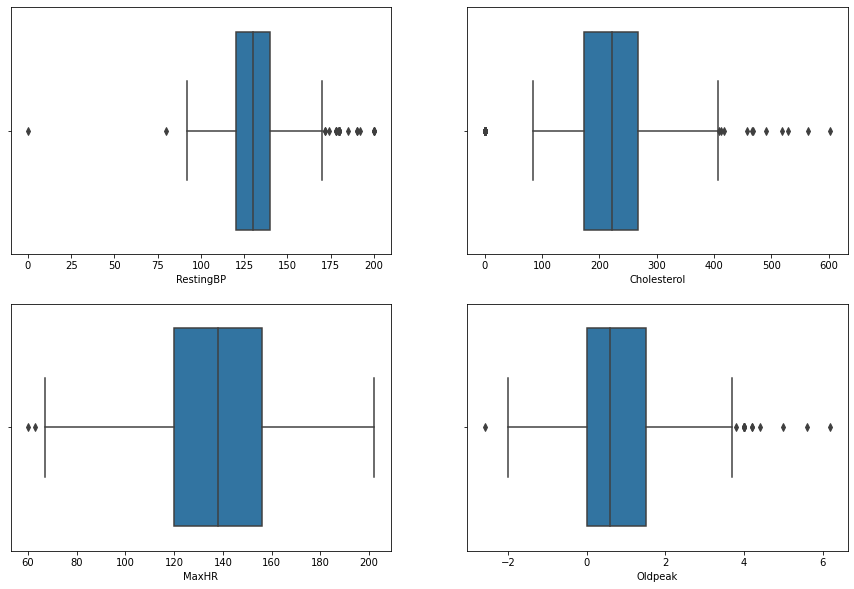

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=data['RestingBP'],ax=axes[0,0])
sns.boxplot(x=data['Cholesterol'],ax=axes[0,1])
sns.boxplot(x=data['MaxHR'],ax=axes[1,0])
sns.boxplot(x=data['Oldpeak'],ax=axes[1,1])
plt.show();

In [ ]:
def count_outliers(data, col):
        q1 = data[col].quantile(0.25, interpolation='nearest')
        q2 = data[col].quantile(0.5, interpolation='nearest')
        q3 = data[col].quantile(0.75, interpolation='nearest')
        q4 = data[col].quantile(1, interpolation='nearest')
        IQR = q3 - q1
        lst = []
        LLP = q1 - (1.5 * IQR)
        ULP = q3 + (1.5 * IQR)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("There are no outliers in", col)
        else:
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            print('There are ' + str(x + y) + ' outliers in ' + col)

x = data.drop(categorical, axis = 1)
for column in x.columns:
    count_outliers(data, column)

There are no outliers in Age
There are 28 outliers in RestingBP
There are 183 outliers in Cholesterol
There are 2 outliers in MaxHR
There are 16 outliers in Oldpeak


### **Resting Blood Pressure**

In [ ]:
#It's not possible to have a resting heart bloop pressure of zero.
print('Number of rows where RestingBP == 0: ' +   str((data['RestingBP']==0).sum()))
print('We will impute this value of 0 with the median RestingBP below')

Number of rows where RestingBP == 0: 1
We will impute this value of 0 with the median RestingBP below


In [ ]:
for i in data['RestingBP']:
    if i == 0:
        data['RestingBP'] = data['RestingBP'].replace(i, data['RestingBP'].median())

# We check to see if a high BP value has any correlation with having a heart disease
qHigh = data['RestingBP'].quantile(0.75)
print(data[data['RestingBP'] >= qHigh].value_counts(data['HeartDisease']))
print('We can see that there is a increase in heart disease with high RestingBP. So we will not change this outliers.')

HeartDisease
1    205
0    122
dtype: int64
We can see that there is a increase in heart disease with high RestingBP. So we will not change this outliers.


### **Cholesterol**

In [ ]:
#Low cholesterol levels seems suspicious. But there are many datapoints.
print((data['Cholesterol']==0).sum())

172


In [ ]:
#Check correlation of heart disease with zero cholesterol level.
print(data[data['Cholesterol'] == 0].value_counts(data['HeartDisease']))
print('However, we see that heart disease is far more common with very low cholesterol levels so we will not impute the data.')

HeartDisease
1    152
0     20
dtype: int64
However, we see that heart disease is far more common with very low cholesterol levels so we will not impute the data.


### **Maximum Heart Rate**

In [ ]:
# There are some rows with very low maximum heart rates. Lets see how it affects the Heart disease
print(data[data['MaxHR'] <= 75].value_counts(data['HeartDisease']))
print('We see that low maximum heart rates are more common with heart disease so we will not impute the data here either')

HeartDisease
1    8
0    1
dtype: int64
We see that low maximum heart rates are more common with heart disease so we will not impute the data here either


### **OldPeak**

In [ ]:
#There are some rows with very low and very high Old peaks. Lets see how it affects the Heart diseas
print("Low Oldpeak on Heart Disease: ")
print(data[data['Oldpeak'] <= -1].value_counts(data['HeartDisease']))

print("High Oldpeak on Heart Disease: ")
print(data[data['Oldpeak'] >= 3.5].value_counts(data['HeartDisease']))
print('')
print('We can see that very low and very high old peaks are associated with Heart Disease.')

Low Oldpeak on Heart Disease: 
HeartDisease
1    5
0    1
dtype: int64
High Oldpeak on Heart Disease: 
HeartDisease
1    20
0     2
dtype: int64

We can see that very low and very high old peaks are associated with Heart Disease.


# **Feature Engineering**

In [ ]:
'''Very high blood pressure levels (hypertension (Stage 2) and hypertensive crisis)
as defined by the American Heart Association.

Source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings'''

def blood_pressure_levels(df):
    if df['RestingBP'] >= 140:
        return 'Very_High'
    elif df['RestingBP'] >= 130 and df['RestingBP'] <= 139:
      return 'High'
    else:
        return 'Normal'

In [ ]:
'''Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. 
A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

Source: https://www.medicalnewstoday.com/articles/315900 '''
    
def cholesterol_levels(df):
    if df['Cholesterol'] >= 200 and df['Cholesterol'] <= 239:
        return 'Borderline_High'
    elif df['Cholesterol'] > 239:
        return 'High'
    else:
        return 'Normal'

In [ ]:
# Adding our new features
data['Cholesterol_Categories'] = data.apply(cholesterol_levels, axis=1)
data['Systolic_Blood_Pressure'] = data.apply(blood_pressure_levels, axis=1)

In [ ]:
features = data.drop(['HeartDisease'], axis=1)
y = data.HeartDisease

In [ ]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
               'ExerciseAngina', 'ST_Slope', 'Cholesterol_Categories', 'Systolic_Blood_Pressure']

In [ ]:
features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Cholesterol_Categories,Systolic_Blood_Pressure
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,High,Very_High
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,Normal,Very_High
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,High,High
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,Borderline_High,High
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,Normal,Very_High


In [ ]:
X = pd.get_dummies(features, columns = categorical_cols)
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Categories_Borderline_High,Cholesterol_Categories_High,Cholesterol_Categories_Normal,Systolic_Blood_Pressure_High,Systolic_Blood_Pressure_Normal,Systolic_Blood_Pressure_Very_High
0,40,140.0,289,172,0.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180,156,1.0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,37,130.0,283,98,0.0,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,48,138.0,214,108,1.5,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
4,54,150.0,195,122,0.0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
X.dtypes

Age                                         int64
RestingBP                                 float64
Cholesterol                                 int64
MaxHR                                       int64
Oldpeak                                   float64
Sex_F                                       uint8
Sex_M                                       uint8
ChestPainType_ASY                           uint8
ChestPainType_ATA                           uint8
ChestPainType_NAP                           uint8
ChestPainType_TA                            uint8
FastingBS_0                                 uint8
FastingBS_1                                 uint8
RestingECG_LVH                              uint8
RestingECG_Normal                           uint8
RestingECG_ST                               uint8
ExerciseAngina_N                            uint8
ExerciseAngina_Y                            uint8
ST_Slope_Down                               uint8
ST_Slope_Flat                               uint8


### **Features Scaled**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(X)
X_scaled = pd.DataFrame(scaled_features, columns = X.columns)
X_scaled.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Categories_Borderline_High,Cholesterol_Categories_High,Cholesterol_Categories_Normal,Systolic_Blood_Pressure_High,Systolic_Blood_Pressure_Normal,Systolic_Blood_Pressure_Very_High
0,-1.433140,0.415002,0.825070,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,...,-0.823556,-0.271448,-1.002181,1.150674,-0.589930,1.236497,-0.728011,-0.556379,-0.829156,1.344373
1,-0.478484,1.527329,-0.171961,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,...,-0.823556,-0.271448,0.997824,-0.869056,-0.589930,-0.808736,1.373606,-0.556379,-0.829156,1.344373
2,-1.751359,-0.141161,0.770188,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,...,-0.823556,-0.271448,-1.002181,1.150674,-0.589930,1.236497,-0.728011,1.797335,-0.829156,-0.743841
3,-0.584556,0.303769,0.139040,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,...,1.214246,-0.271448,0.997824,-0.869056,1.695116,-0.808736,-0.728011,1.797335,-0.829156,-0.743841
4,0.051881,0.971166,-0.034755,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,...,-0.823556,-0.271448,-1.002181,1.150674,-0.589930,-0.808736,1.373606,-0.556379,-0.829156,1.344373


### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Categories_Borderline_High,Cholesterol_Categories_High,Cholesterol_Categories_Normal,Systolic_Blood_Pressure_High,Systolic_Blood_Pressure_Normal,Systolic_Blood_Pressure_Very_High
378,70,140.0,0,157,2.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
356,46,115.0,0,113,1.5,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
738,65,160.0,360,151,0.8,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
85,66,140.0,139,94,1.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
427,59,140.0,0,117,1.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
X_test.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Categories_Borderline_High,Cholesterol_Categories_High,Cholesterol_Categories_Normal,Systolic_Blood_Pressure_High,Systolic_Blood_Pressure_Normal,Systolic_Blood_Pressure_Very_High
306,55,115.0,0,155,0.1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
711,66,120.0,302,151,0.4,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
298,51,110.0,0,92,0.0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
466,55,120.0,0,125,2.5,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
253,62,140.0,271,152,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
y_train.head()

378    1
356    1
738    0
85     1
427    1
Name: HeartDisease, dtype: int64

In [ ]:
y_test.head()

306    1
711    0
298    1
466    1
253    0
Name: HeartDisease, dtype: int64

In [ ]:
# train-test split for scaled features

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [ ]:
X_train_scaled.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Categories_Borderline_High,Cholesterol_Categories_High,Cholesterol_Categories_Normal,Systolic_Blood_Pressure_High,Systolic_Blood_Pressure_Normal,Systolic_Blood_Pressure_Very_High
378,1.749048,0.415002,-1.818435,0.793455,1.043759,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,1.214246,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,-0.829156,1.344373
356,-0.796702,-0.975406,-1.818435,-0.935665,0.574711,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,1.214246,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,1.206045,-0.743841
738,1.218683,1.527329,1.474513,0.557666,-0.081956,1.938163,-1.938163,-1.084138,-0.481887,1.876744,...,-0.823556,-0.271448,-1.002181,1.150674,-0.58993,1.236497,-0.728011,-0.556379,-0.829156,1.344373
85,1.324756,0.415002,-0.546991,-1.682331,0.105664,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,1.214246,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,-0.829156,1.344373
427,0.582246,0.415002,-1.818435,-0.778472,0.105664,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,1.214246,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,-0.829156,1.344373


In [ ]:
X_test_scaled.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Categories_Borderline_High,Cholesterol_Categories_High,Cholesterol_Categories_Normal,Systolic_Blood_Pressure_High,Systolic_Blood_Pressure_Normal,Systolic_Blood_Pressure_Very_High
306,0.157954,-0.975406,-1.818435,0.714859,-0.738623,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,-0.823556,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,1.206045,-0.743841
711,1.324756,-0.697325,0.943982,0.557666,-0.457194,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,-0.823556,-0.271448,0.997824,-0.869056,-0.58993,1.236497,-0.728011,-0.556379,1.206045,-0.743841
298,-0.266338,-1.253488,-1.818435,-1.760927,-0.832432,-0.515952,0.515952,0.922392,-0.481887,-0.532838,...,-0.823556,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,1.206045,-0.743841
466,0.157954,-0.697325,-1.818435,-0.464087,1.512807,-0.515952,0.515952,-1.084138,-0.481887,1.876744,...,1.214246,-0.271448,0.997824,-0.869056,-0.58993,-0.808736,1.373606,-0.556379,1.206045,-0.743841
253,0.900464,0.415002,0.660423,0.596964,0.105664,-0.515952,0.515952,-1.084138,2.075177,-0.532838,...,-0.823556,-0.271448,-1.002181,1.150674,-0.58993,1.236497,-0.728011,-0.556379,-0.829156,1.344373


# Modeling

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(solver = 'liblinear')
model_LR.fit(X_train_scaled, y_train)

y_pred = model_LR.predict(X_test_scaled)

Accuracy: 0.8261
F1 Score: 0.8558558558558558
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        77
           1       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



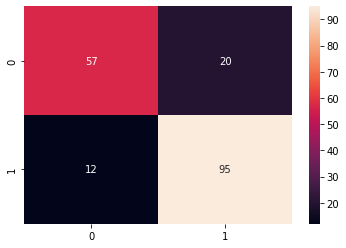

In [ ]:
#Confusion Matrix and Accuracy
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)

accuracy = round(accuracy_score(y_test, y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

In [ ]:
#Using KFold Cross Validation
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
from sklearn.model_selection import cross_validate

scores = cross_validate(LogisticRegression(solver='liblinear'), X, y, 
                        cv=cv,scoring = ['accuracy','f1_macro','precision','recall'])

model_scores = pd.DataFrame(scores, index = range(1, 6))
model_scores

,fit_time,score_time,test_accuracy,test_f1_macro,test_precision,test_recall
1,0.011460,0.007110,0.923913,0.920523,0.928571,0.945455
2,0.007916,0.006648,0.826087,0.824008,0.868687,0.819048
3,0.007698,0.006667,0.858696,0.857619,0.836538,0.906250
4,0.007876,0.007050,0.868852,0.868534,0.865979,0.884211
5,0.007808,0.007336,0.852459,0.847805,0.831858,0.921569


In [ ]:
print('Accuracy: %.4f (std: %.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))
print('F1 Score : %.4f' % (np.mean(scores['test_f1_macro'])))
print('Precision : %.4f' % (np.mean(scores['test_precision'])))
print('Recall : %.4f' % (np.mean(scores['test_recall'])))

Accuracy: 0.8660 (std: 0.032)
F1 Score : 0.8637
Precision : 0.8663
Recall : 0.8953


In [ ]:
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

feature_importances = model_LR.coef_[0]

importances = pd.DataFrame(index = X.columns, data = feature_importances,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
importances

,Feature Importance
ST_Slope_Flat,0.677335
ChestPainType_ASY,0.524287
Oldpeak,0.465361
RestingBP,0.355550
Cholesterol_Categories_High,0.352221
Sex_M,0.326004
FastingBS_1,0.256031
Systolic_Blood_Pressure_Normal,0.185596
ExerciseAngina_Y,0.183164
RestingECG_LVH,0.064203


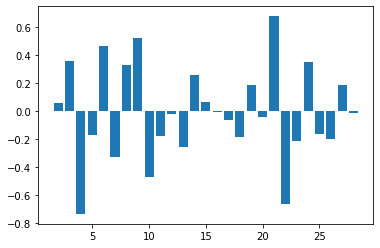

In [ ]:
from matplotlib import pyplot
pyplot.bar([x + 1 for x in range(1, len(feature_importances) + 1)], feature_importances)
pyplot.show();

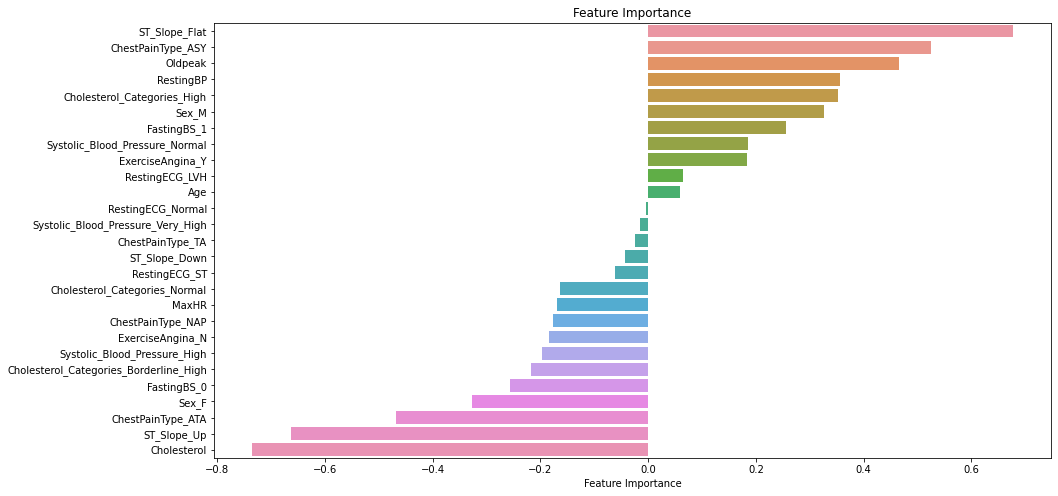

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x=importances["Feature Importance"], y= importances.index)
plt.title("Feature Importance")
plt.show()

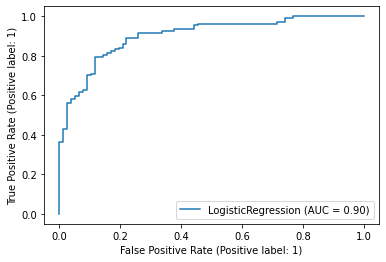

In [ ]:
plot_roc_curve(model_LR, X_test_scaled, y_test, response_method='auto');

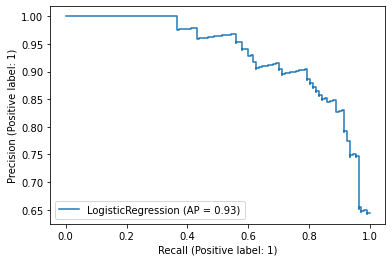

In [ ]:
plot_precision_recall_curve(model_LR, X_test_scaled, y_test);

### **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_rates = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred != y_test))

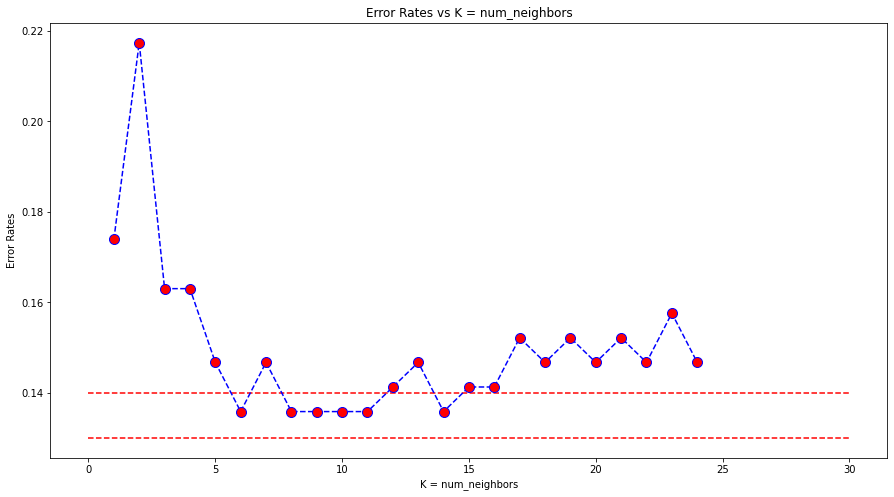

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(range(1, 25),error_rates,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rates vs K = num_neighbors')
plt.xlabel('K = num_neighbors')
plt.ylabel('Error Rates')
plt.hlines(y=0.14, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13, xmin=0, xmax=30, colors='r', linestyles="--");

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 6)
model_KNN.fit(X_train_scaled, y_train)

y_pred = model_KNN.predict(X_test_scaled)

Accuracy: 0.8641
F1 Score: 0.883720930232558
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



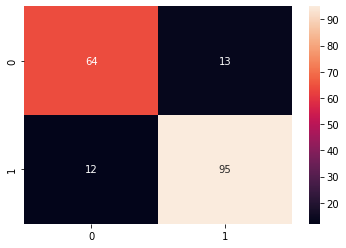

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)

accuracy = round(accuracy_score(y_test,y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

In [ ]:
scores = cross_validate(model_KNN, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
model_scores = pd.DataFrame(scores, index = range(1, 11))
model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005903,0.029520,0.810811,0.813953,0.853659,0.833333
2,0.004992,0.020529,0.837838,0.868421,0.825000,0.846154
3,0.005487,0.016148,0.878378,0.878049,0.900000,0.888889
4,0.004616,0.016140,0.810811,0.861111,0.775000,0.815789
5,0.004360,0.030950,0.808219,0.825000,0.825000,0.825000
6,0.004730,0.015348,0.876712,0.897436,0.875000,0.886076
7,0.004700,0.015866,0.876712,0.878049,0.900000,0.888889
8,0.004629,0.016086,0.863014,0.916667,0.825000,0.868421
9,0.004487,0.035532,0.890411,0.900000,0.900000,0.900000
10,0.004971,0.015483,0.753425,0.805556,0.725000,0.763158


In [ ]:
print('Accuracy: %.4f (std: %.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))
print('F1 Score : %.4f' % (np.mean(scores['test_f1'])))
print('Precision : %.4f' % (np.mean(scores['test_precision'])))
print('Recall : %.4f' % (np.mean(scores['test_recall'])))

Accuracy: 0.8406 (std: 0.042)
F1 Score : 0.8516
Precision : 0.8644
Recall : 0.8404


In [ ]:
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

feature_imp = permutation_importance(model_KNN, X_train_scaled, y_train, scoring = 'accuracy')
feature_importances = feature_imp.importances_mean

importances = pd.DataFrame(index = X.columns, data = feature_importances,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
importances

,Feature Importance
ST_Slope_Up,0.022343
ST_Slope_Flat,0.022071
FastingBS_1,0.007357
FastingBS_0,0.007357
RestingECG_ST,0.006267
Cholesterol_Categories_Borderline_High,0.005995
Sex_F,0.005450
Sex_M,0.005450
Oldpeak,0.005177
ChestPainType_TA,0.004905


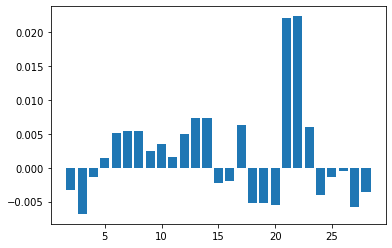

In [ ]:
from matplotlib import pyplot
pyplot.bar([x + 1 for x in range(1, len(feature_importances) + 1)], feature_importances)
pyplot.show();

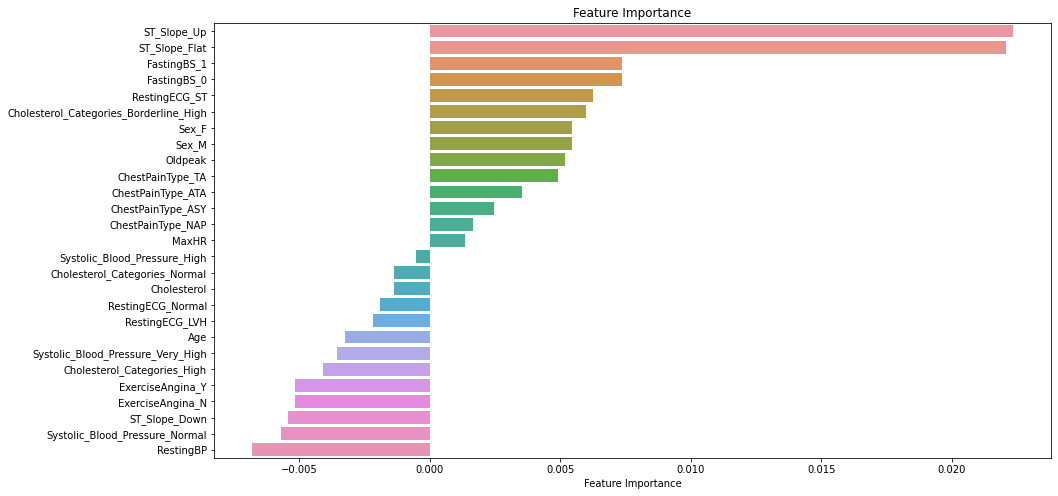

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x=importances["Feature Importance"], y= importances.index)
plt.title("Feature Importance")
plt.show()

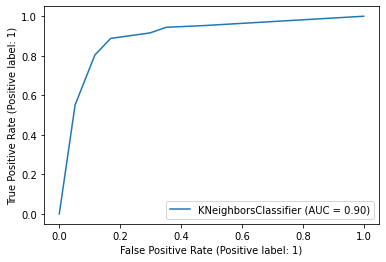

In [ ]:
plot_roc_curve(model_KNN, X_test_scaled, y_test);

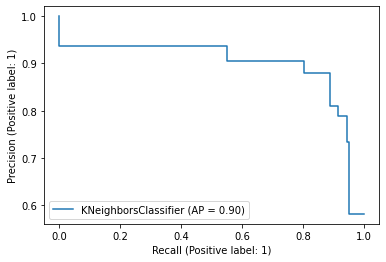

In [ ]:
plot_precision_recall_curve(model_KNN, X_test_scaled, y_test);

### **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

error_rates = []
for i in range(1, 25):
    knn = RandomForestClassifier(criterion = 'entropy', max_depth = i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred != y_test))

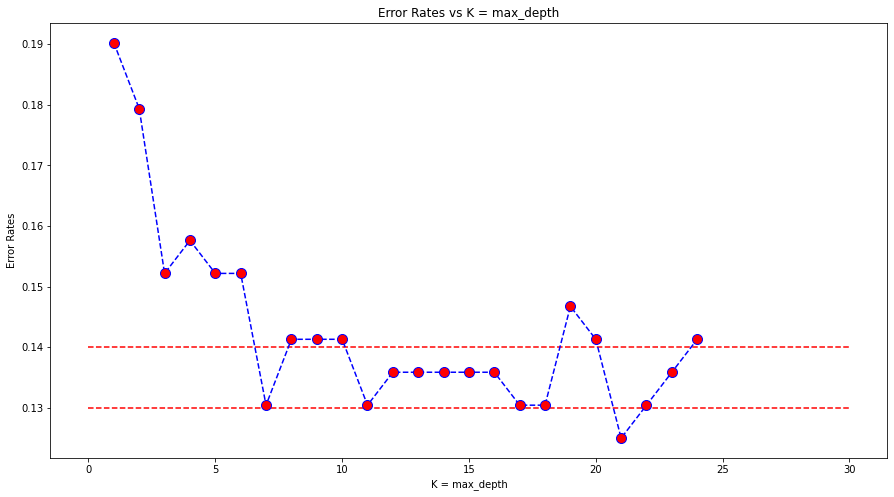

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(range(1, 25),error_rates,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rates vs K = max_depth')
plt.xlabel('K = max_depth')
plt.ylabel('Error Rates')
plt.hlines(y= 0.14, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y= 0.13, xmin=0, xmax=30, colors='r', linestyles="--");

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(criterion = 'entropy', max_depth = 11, n_estimators = 100)
model_RF.fit(X_train_scaled, y_train)

y_pred = model_RF.predict(X_test_scaled)

Accuracy: 0.8533
F1 Score: 0.8778280542986425
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



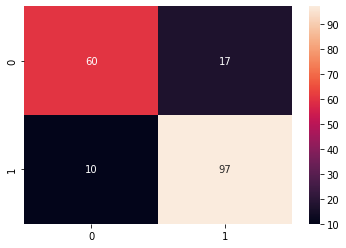

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)

accuracy = round(accuracy_score(y_test,y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

In [ ]:
scores = cross_validate(model_RF, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
model_scores = pd.DataFrame(scores, index = range(1, 11))
model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.251095,0.022259,0.864865,0.860465,0.902439,0.880952
2,0.266870,0.026791,0.837838,0.818182,0.900000,0.857143
3,0.247296,0.022618,0.891892,0.880952,0.925000,0.902439
4,0.241367,0.030177,0.891892,0.921053,0.875000,0.897436
5,0.234257,0.032866,0.876712,0.860465,0.925000,0.891566
6,0.239541,0.022747,0.917808,0.904762,0.950000,0.926829
7,0.236529,0.028934,0.904110,0.883721,0.950000,0.915663
8,0.274125,0.022408,0.890411,0.880952,0.925000,0.902439
9,0.260456,0.026096,0.958904,0.930233,1.000000,0.963855
10,0.276589,0.025681,0.821918,0.829268,0.850000,0.839506


In [ ]:
print('Accuracy: %.4f (std: %.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))
print('F1 Score : %.4f' % (np.mean(scores['test_f1'])))
print('Precision : %.4f' % (np.mean(scores['test_precision'])))
print('Recall : %.4f' % (np.mean(scores['test_recall'])))

Accuracy: 0.8856 (std: 0.037)
F1 Score : 0.8978
Precision : 0.8770
Recall : 0.9202


In [ ]:
feature_importances = model_RF.feature_importances_

importances = pd.DataFrame(index = X.columns, data = feature_importances,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
importances

,Feature Importance
ST_Slope_Up,0.113293
ST_Slope_Flat,0.102928
Oldpeak,0.101860
MaxHR,0.094595
Cholesterol,0.081300
ChestPainType_ASY,0.066602
Age,0.064186
RestingBP,0.056543
ExerciseAngina_Y,0.044457
ExerciseAngina_N,0.042383


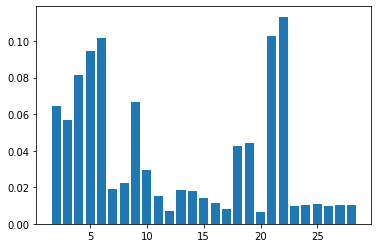

In [ ]:
from matplotlib import pyplot
pyplot.bar([x + 1 for x in range(1, len(feature_importances) + 1)], feature_importances)
pyplot.show();

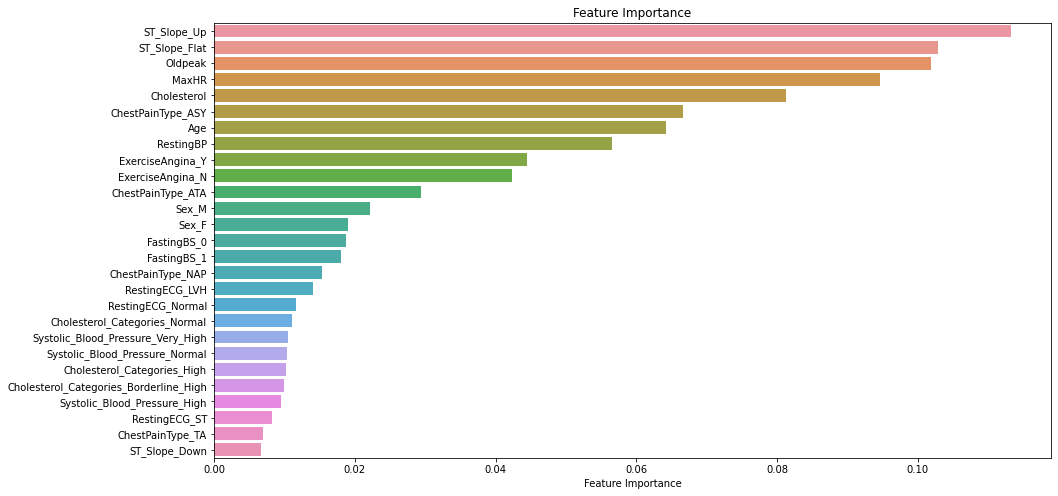

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x=importances["Feature Importance"], y= importances.index)
plt.title("Feature Importance")
plt.show()

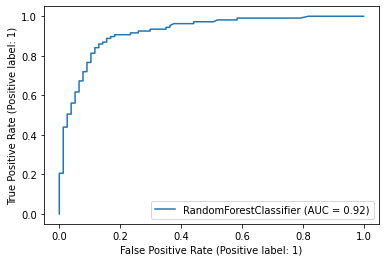

In [ ]:
plot_roc_curve(model_RF, X_test_scaled, y_test);

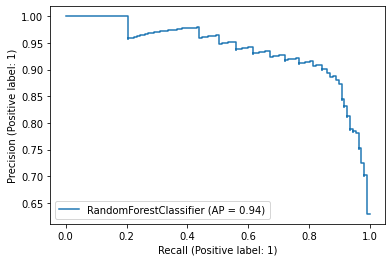

In [ ]:
plot_precision_recall_curve(model_RF, X_test_scaled, y_test);

### **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
model_DT.fit(X_train_scaled, y_train)

y_pred = model_DT.predict(X_test_scaled)

Accuracy: 0.7826
F1 Score: 0.8058252427184466
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        77
           1       0.84      0.78      0.81       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184



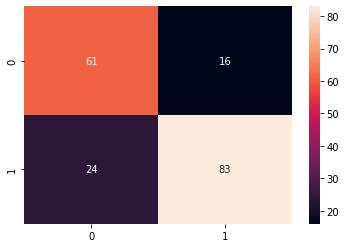

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)

accuracy = round(accuracy_score(y_test,y_pred), 4)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

In [ ]:
scores = cross_validate(model_DT, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
model_scores = pd.DataFrame(scores, index = range(1, 11))
model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.009527,0.007094,0.824324,0.850000,0.829268,0.839506
2,0.008065,0.008975,0.770270,0.794872,0.775000,0.784810
3,0.010463,0.009131,0.756757,0.750000,0.825000,0.785714
4,0.007343,0.006943,0.756757,0.843750,0.675000,0.750000
5,0.006866,0.006985,0.794521,0.820513,0.800000,0.810127
6,0.007053,0.007031,0.780822,0.772727,0.850000,0.809524
7,0.007466,0.006727,0.794521,0.820513,0.800000,0.810127
8,0.007118,0.007215,0.835616,0.868421,0.825000,0.846154
9,0.007485,0.006989,0.904110,0.866667,0.975000,0.917647
10,0.006838,0.006394,0.780822,0.815789,0.775000,0.794872


In [ ]:
print('Accuracy: %.4f (std: %.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))
print('F1 Score : %.4f' % (np.mean(scores['test_f1'])))
print('Precision : %.4f' % (np.mean(scores['test_precision'])))
print('Recall : %.4f' % (np.mean(scores['test_recall'])))

Accuracy: 0.7999 (std: 0.043)
F1 Score : 0.8148
Precision : 0.8203
Recall : 0.8129


In [ ]:
feature_importances = model_DT.feature_importances_

importances = pd.DataFrame(index = X.columns, data = feature_importances,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
importances

,Feature Importance
ST_Slope_Up,0.422726
Oldpeak,0.095921
MaxHR,0.084045
Age,0.075647
ChestPainType_ASY,0.070031
Cholesterol,0.066078
RestingBP,0.049739
Systolic_Blood_Pressure_High,0.020949
RestingECG_LVH,0.020419
Sex_M,0.015769


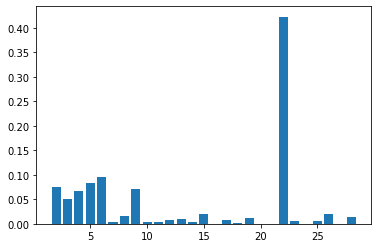

In [ ]:
from matplotlib import pyplot
pyplot.bar([x + 1 for x in range(1, len(feature_importances) + 1)], feature_importances)
pyplot.show();

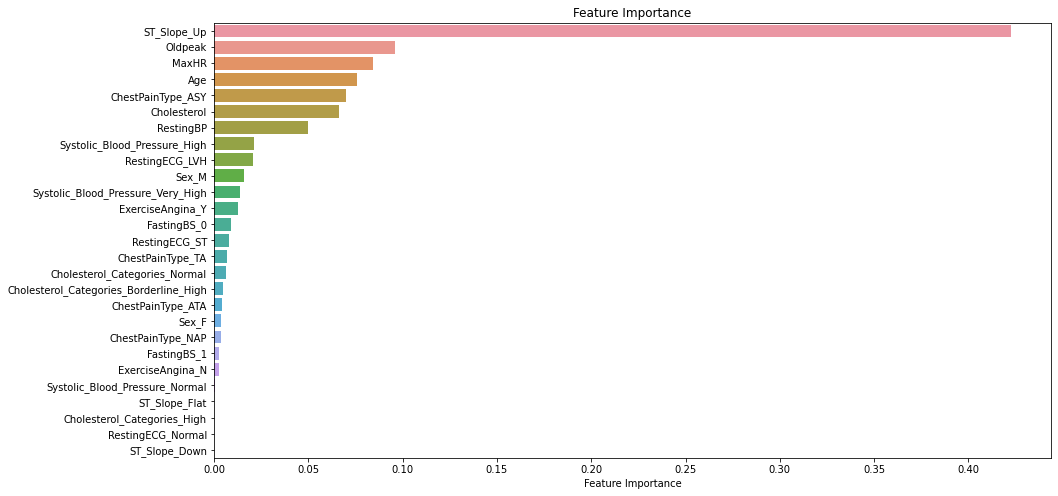

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x=importances["Feature Importance"], y= importances.index)
plt.title("Feature Importance")
plt.show()

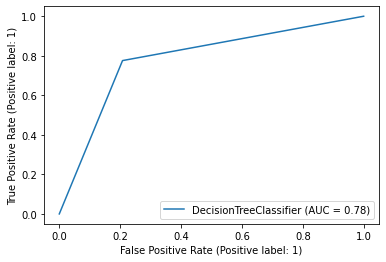

In [ ]:
plot_roc_curve(model_DT, X_test_scaled, y_test);

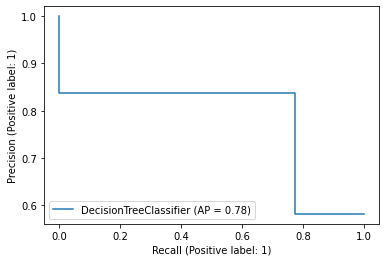

In [ ]:
plot_precision_recall_curve(model_DT, X_test_scaled, y_test);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d7d3f7da-567f-4b92-adea-0c5aca3b1495' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>